In [3]:
import hashlib

def generate_hash(word, type='md5'):
    h = hashlib.new(type)
    h.update(word)
    return h.hexdigest()

['sha256', 'sha512', 'md5', 'sha1', 'sha384', 'sha3_224', 'sha3_256', 'sha224', 'sha3_384', 'sha3_512']
algo: sha256, pswd: admin, time: 2.0300038158893585e-05
algo: sha256, pswd: hunter2, time: 1.5199882909655571e-05
algo: sha256, pswd: password, time: 6.299931555986404e-06
algo: sha256, pswd: qwertyuiopasdf, time: 5.699926987290382e-06
algo: sha512, pswd: admin, time: 0.0005881001707166433
algo: sha512, pswd: hunter2, time: 1.9200146198272705e-05
algo: sha512, pswd: password, time: 8.400063961744308e-06
algo: sha512, pswd: qwertyuiopasdf, time: 8.699949830770493e-06
algo: md5, pswd: admin, time: 1.6899779438972473e-05
algo: md5, pswd: hunter2, time: 4.800036549568176e-06
algo: md5, pswd: password, time: 4.299916326999664e-06
algo: md5, pswd: qwertyuiopasdf, time: 4.09991480410099e-06
algo: sha1, pswd: admin, time: 0.0003978998865932226
algo: sha1, pswd: hunter2, time: 1.9700033590197563e-05
algo: sha1, pswd: password, time: 9.200070053339005e-06
algo: sha1, pswd: qwertyuiopasdf, time

<Axes: >

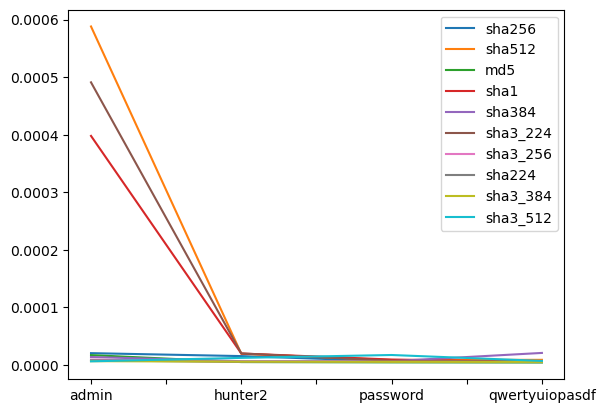

In [2]:
import time
import numpy as np
import pandas as pd

pswds = ['admin', 'hunter2', 'password', 'qwertyuiopasdf']
algos = list(hashlib.algorithms_guaranteed)
algos = [algo for algo in algos if not algo.startswith(('shake', 'blake'))]
print(algos)
df = pd.DataFrame(index=pswds, columns=algos)
df.fillna(0)

for algo in algos:
    for pswd in pswds:
        t0 = time.perf_counter()
        generate_hash(pswd.encode(), algo)
        t1 = time.perf_counter()
        df.at[pswd, algo] = t1-t0
        print('algo: {}, pswd: {}, time: {}'.format(algo, pswd, t1-t0))
   
print(df)     
df.plot()
    

In [2]:
def to_bin_str(h: str):
    n = int(h, base=16)
    return format(n, 'b')

In [6]:
from collections import Counter
import math

counter = Counter()
n = 10
b_len = math.ceil(n/8)
k = 12

for i in range(2**n):
    b = i.to_bytes(length=b_len)
    hash = generate_hash(b)
    b_hash = to_bin_str(hash)[:12]
    counter[b_hash] += 1
    
print(counter.most_common(1))

[('101010111001', 4)]


In [7]:
h1 = generate_hash('very_secure_password1'.encode())
h2 = generate_hash('very_secure_password3'.encode())
b1 = to_bin_str(h1)
b2 = to_bin_str(h2)
changed = 0
same = 0
for s1, s2 in zip(b1, b2):
    if s1 == s2:
        same += 1
    else:
        changed += 1
        
print(same, changed)

67 60
